In [2]:
#======================
# DOWNLOAD OF THE DATA
#======================
zip_url <- "https://github.com/ChristianJudge/Portfolio/raw/main/Divvy_Trips_Q1.zip"  # Accessing the zip file location on GitHub
download.file(zip_url, "Divvy_Trips_Q1.zip", mode = "wb")  # Download in binary mode

unzip("Divvy_Trips_Q1.zip", exdir = "data_folder")  # Extracts files into 'data_folder'

In [3]:
#=======================
# PREPARING ENVIRONMENT
#=======================
library(tidyverse)  #helps wrangle data
# Use the conflicted package to manage conflicts
library(conflicted)

# Set dplyr::filter and dplyr::lag as the default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


In [4]:
#=====================
# COLLECT DATA
#=====================

q1_2019 <- read_csv("data_folder/Divvy_Trips_2019_Q1.csv")
q1_2020 <- read_csv("data_folder/Divvy_Trips_2020_Q1.csv")



Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this 

In [5]:
#====================================================
# WRANGLE DATA AND COMBINE INTO A SINGLE FILE
#====================================================
# Compare column names each of the files
# While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file
colnames(q1_2019)
colnames(q1_2020)

# Rename columns  to make them consistent with q1_2020 (as this will be the supposed going-forward table design for Divvy)

(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
))

# Inspect the dataframes and look for incongruencies
str(q1_2019)
str(q1_2020)

# Convert ride_id and rideable_type to character so that they can stack correctly
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

# Stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(q1_2019, q1_2020)#, q3_2019)#, q4_2019, q1_2020)

# Remove lat, long, birthyear, and gender fields as this data was dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,1727,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : POSIXct[1:365069], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:365069], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:365069] "Subscriber" "Subscriber" "

In [6]:
#======================================================
# CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS
#======================================================
# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

# There are a few problems to fix:
# (1) In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.
# (2) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
# (3) We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.
# (4) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
# Before 2020, Divvy used different labels for these two types of riders ... we will want to make our dataframe consistent with their current nomenclature
# N.B.: "Level" is a special property of a column that is retained even if a subset does not contain any values from a specific level
# Begin by seeing how many observations fall under each usertype
table(all_trips$member_casual)

# Reassign to the desired values (we will go with the current 2020 labels)
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

# Check to make sure the proper number of observations were reassigned
table(all_trips$member_casual)

# Add columns that list the date, month, day, and year of each ride
# This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level

all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# Add a "ride_length" calculation to all_trips (in seconds)
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

# Inspect the structure of the columns
str(all_trips)

# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
# We will create a new version of the dataframe (v2) since data is being removed
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 791956

[1] 791956      9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


tibble [791,956 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791956], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:791956], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


   ride_id            started_at                    
 Length:791956      Min.   :2019-01-01 00:04:37.00  
 Class :character   1st Qu.:2019-02-28 17:04:04.75  
 Mode  :character   Median :2020-01-07 12:48:50.50  
                    Mean   :2019-09-01 11:58:08.35  
                    3rd Qu.:2020-02-19 19:31:54.75  
                    Max.   :2020-03-31 23:51:34.00  
                                                    
    ended_at                      rideable_type      start_station_id
 Min.   :2019-01-01 00:11:07.00   Length:791956      Min.   :  2.0   
 1st Qu.:2019-02-28 17:15:58.75   Class :character   1st Qu.: 77.0   
 Median :2020-01-07 13:02:50.00   Mode  :character   Median :174.0   
 Mean   :2019-09-01 12:17:52.17                      Mean   :204.4   
 3rd Qu.:2020-02-19 19:51:54.50                      3rd Qu.:291.0   
 Max.   :2020-05-19 20:10:34.00                      Max.   :675.0   
                                                                     
 start_station_n


    casual   Customer     member Subscriber 
     48480      23163     378407     341906 


casual member 
 71643 720313 

tibble [791,956 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : POSIXct[1:791956], format: "2019-01-01 00:04:37" "2019-01-01 00:08:13" ...
 $ ended_at          : POSIXct[1:791956], format: "2019-01-01 00:11:07" "2019-01-01 00:15:34" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ date              : Date[1:791956], format: "2019-01-01" "2

[1] FALSE

[1] TRUE

In [7]:
#=====================================
# DESCRIPTIVE ANALYSIS
#=====================================


summary(all_trips_v2$ride_length)

# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# Days of the week are out of order.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      331      539     1189      912 10632022 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5372.7839
member,795.2523


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1393
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,4752.0504
member,Monday,822.3112
casual,Tuesday,4561.8039
member,Tuesday,769.4416
casual,Wednesday,4480.3724
member,Wednesday,711.9838
casual,Thursday,8451.6669


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5061.3044
casual,Mon,5591,4752.0504
casual,Tue,7311,4561.8039
casual,Wed,7690,4480.3724
casual,Thu,7147,8451.6669
casual,Fri,8013,6090.7373
casual,Sat,13473,4950.7708
member,Sun,60197,972.9383
member,Mon,110430,822.3112


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


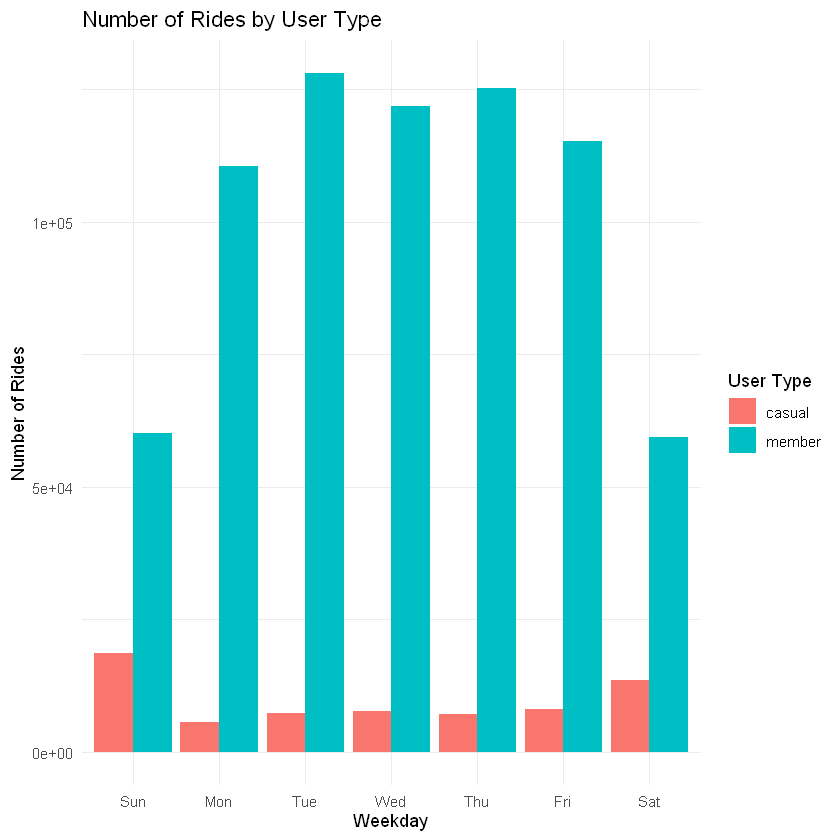

In [8]:
# Vis - 1

# Number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "Number of Rides by User Type", 
       x = "Weekday", 
       y = "Number of Rides", 
       fill = "User Type") +
  theme_minimal()


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


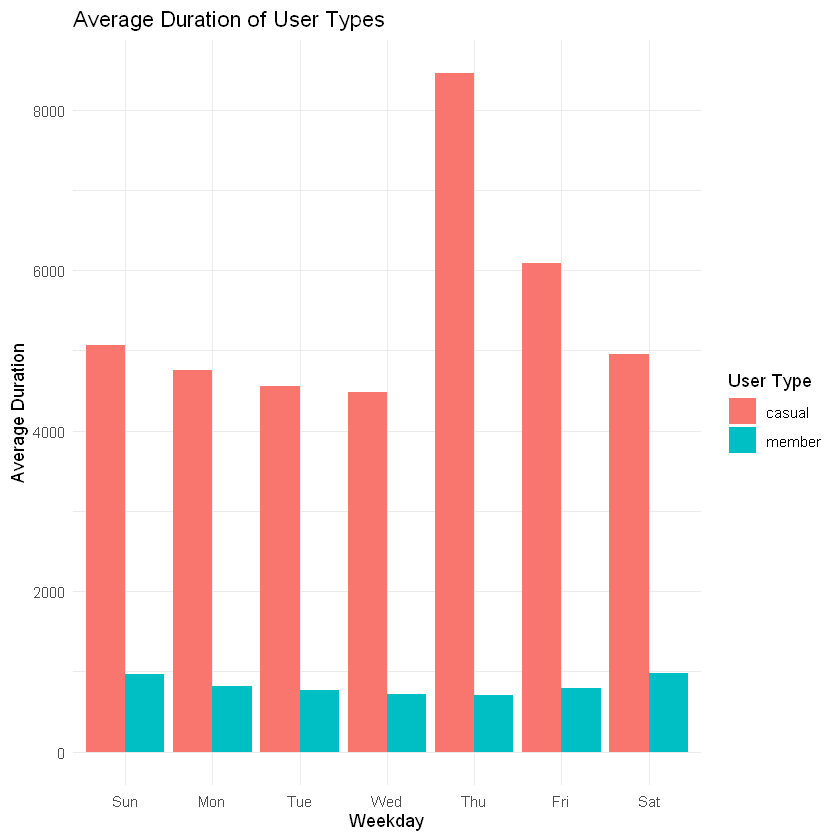

In [9]:
#Vis - 2

# Visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title = "Average Duration of User Types", 
       x = "Weekday", 
       y = "Average Duration", 
       fill = "User Type") +
  theme_minimal()

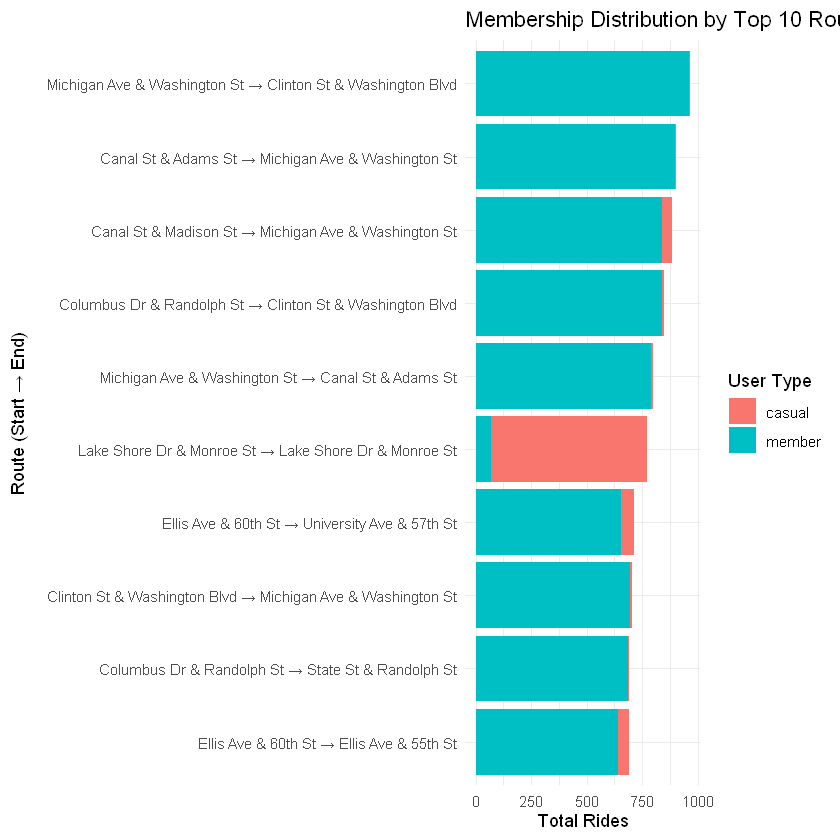

In [10]:
# Vis - 3

# Create a new column combining start and end station names
all_trips_v2 <- all_trips_v2 %>%
  mutate(route = paste(start_station_name, "→", end_station_name))  # Combine with arrow for clarity

# Count occurrences of each route
top_routes <- all_trips_v2 %>%
  count(route, sort = TRUE) %>%
  slice_max(n, n = 10)  # Get the top 10 most popular routes

# Filter the dataset for only the top 10 routes
df_filtered <- all_trips_v2 %>%
  filter(route %in% top_routes$route)

# Aggregate count by route and user type
df_aggregated <- df_filtered %>%
  count(route, member_casual)

# Create the plot
ggplot(df_aggregated, aes(x = reorder(route, n), y = n, fill = member_casual)) +
  geom_col() +
  coord_flip() +  # Flip for better readability
  labs(title = "Membership Distribution by Top 10 Routes", 
       x = "Route (Start → End)", 
       y = "Total Rides", 
       fill = "User Type") +
  theme_minimal()

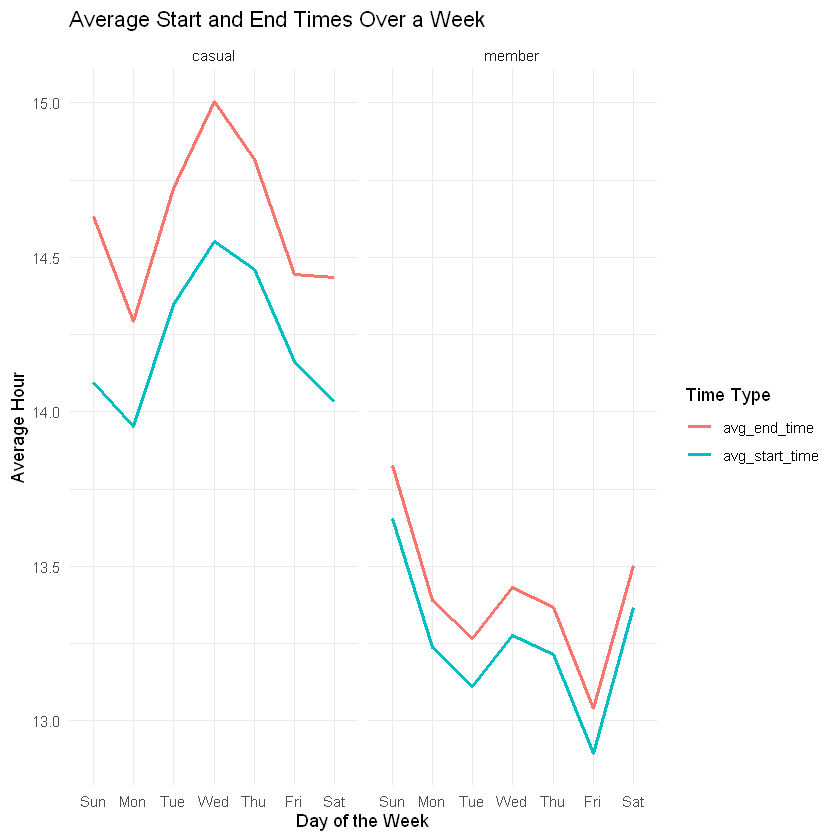

In [11]:
# Vis - 4

library(lubridate)

# Convert start & end times to hours and extract day of the week
df_time <- all_trips_v2 %>%
  mutate(
    day_of_week = wday(started_at, label = TRUE),  # Extract weekday name
    start_hour = hour(started_at),                # Extract start hour
    end_hour = hour(ended_at)                     # Extract end hour
  ) %>%
  group_by(member_casual, day_of_week) %>%
  summarise(
    avg_start_time = mean(start_hour, na.rm = TRUE),  # Average start time per day
    avg_end_time = mean(end_hour, na.rm = TRUE),      # Average end time per day
    .groups = "drop"
  ) %>%
  pivot_longer(cols = c(avg_start_time, avg_end_time), 
               names_to = "time_type", values_to = "average_hour")

# Plot
ggplot(df_time, aes(x = day_of_week, y = average_hour, color = time_type, group = time_type)) +
  geom_line(linewidth = 1) +
  facet_wrap(~ member_casual) +  # Separate graphs for casual & members
  labs(title = "Average Start and End Times Over a Week",
       x = "Day of the Week", y = "Average Hour", color = "Time Type") +
  theme_minimal()

   ride_id            started_at                    
 Length:365069      Min.   :2019-01-01 00:04:37.00  
 Class :character   1st Qu.:2019-01-23 05:26:54.00  
 Mode  :character   Median :2019-02-25 07:52:56.00  
                    Mean   :2019-02-19 21:43:15.42  
                    3rd Qu.:2019-03-17 16:52:47.00  
                    Max.   :2019-03-31 23:53:48.00  
                                                    
    ended_at                      rideable_type       tripduration     
 Min.   :2019-01-01 00:11:07.00   Length:365069      Min.   :      61  
 1st Qu.:2019-01-23 05:49:40.00   Class :character   1st Qu.:     326  
 Median :2019-02-25 08:03:50.00   Mode  :character   Median :     524  
 Mean   :2019-02-19 22:00:11.91                      Mean   :    1016  
 3rd Qu.:2019-03-17 17:16:16.00                      3rd Qu.:     866  
 Max.   :2019-06-17 16:04:35.00                      Max.   :10628400  
                                                                       


ride_id         started_at           ended_at      rideable_type 
                 0                  0                  0                  0 
      tripduration   start_station_id start_station_name     end_station_id 
                 0                  0                  0                  0 
  end_station_name      member_casual             gender          birthyear 
                 0                  0              19711              18023

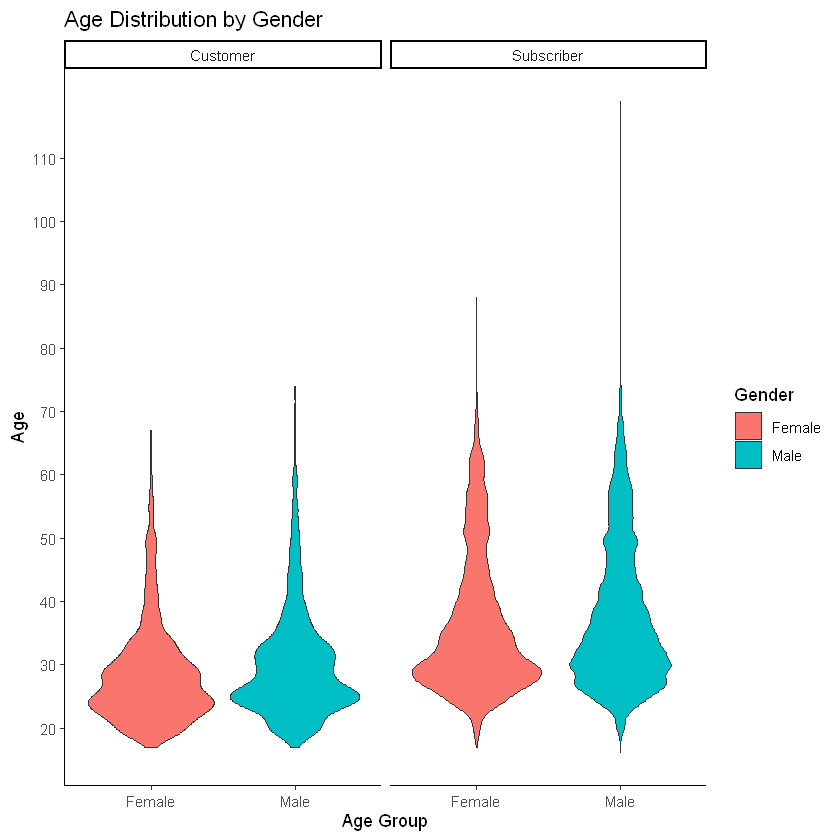

In [12]:
# Vis 5

summary(q1_2019)  # Shows NAs in each column
colSums(is.na(q1_2019))  # Counts NAs per column

df_1 <- q1_2019 %>%
  select(gender, birthyear, member_casual) %>%  # Select relevant columns
  mutate(birthyear = as.numeric(birthyear)) %>%
  drop_na() %>%  # Remove NA values
  mutate(age = 2019 - birthyear) %>%
  drop_na(birthyear, gender) %>%  # Remove rows with missing birthyear or gender
  mutate(age = 2019 - birthyear)

# Plot Violin Chart
ggplot(df_1, aes(x = gender, y = age, fill = gender)) +
  geom_violin() +
facet_wrap(~member_casual)+
  scale_y_continuous(breaks = seq(0, max(df_1$age), by = 10)) +  # Set Y-axis increments to 10
  labs(title = "Age Distribution by Gender",
       x = "Age Group",
       y = "Age",
       fill = "Gender") +
  theme_classic()

In [13]:
#=================================================
# EXPORT SUMMARY FILE FOR FURTHER ANALYSIS
#=================================================
# Create a csv file
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'avg_ride_length.csv')